# Decision Trees

In [1]:
from sklearn import datasets, metrics, tree, model_selection, pipeline, ensemble
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from utilities import *

In [2]:
rng = 0
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (12.8, 7.2)

In [3]:
breastCancer = datasets.load_breast_cancer(as_frame=True)

In [4]:
breastCancer.frame.shape

(569, 31)

In [5]:
breastCancer.frame.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [6]:
breastCancer.data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
breastCancer.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [8]:
breastCancer.target.nunique()

2

In [9]:
X = breastCancer.data
y = breastCancer.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=rng)

In [10]:
decision_tree_grid = [
  {
    "max_depth": list(range(1, 16, 1)) + [None],
    "min_samples_leaf": np.arange(1, 16, 1),
  }
]
model = model_selection.GridSearchCV(
  tree.DecisionTreeClassifier(random_state=rng),
  decision_tree_grid,
  scoring=metrics.make_scorer(metrics.f1_score), 
  cv=5,
  return_train_score=True,
)

In [11]:
# real targets and predicted targets scatter plot
def plot(x, yReal, yPredicted, title):
  fig, ax = plt.subplots(figsize=(12.8,7.2), dpi=100)
  ax.plot(x, yReal, linestyle="-", marker="o",  color='blue', label="train")
  ax.plot(x, yPredicted, linestyle="--", marker="x", color='orange', label="test")

  ax.set_xlabel("Max depth")
  ax.set_ylabel("Score")
  ax.legend()
  # Display 'ticks' in x-axis and y-axis
  plt.xticks()
  plt.yticks()
  plt.title(title)
  # Show plot
  plt.show()
  return

In [12]:
# fits the model then predicts and evaluates on both the training and test sets
def run(x_train, x_test, y_train, y_test, model):
  predictions = {}
  model.fit(x_train, y_train)
  predictions["train"] = model.predict(x_train)

  
  print("Training Set Evaluation:")
  print("F1 = ", metrics.f1_score(y_train, predictions["train"]))
  confusion_matrix = metrics.confusion_matrix(y_train, predictions["train"])
  print(confusion_matrix)
  
  predictions["test"] = model.predict(x_test)
  
  print("Test Set Evaluation:")
  print("F1 = ", metrics.f1_score(y_test, predictions["test"]))
  confusion_matrix = metrics.confusion_matrix(y_test, predictions["test"])
  print(confusion_matrix)
  return predictions

In [13]:
run(x_train, x_test, y_train, y_test, model)

Training Set Evaluation:
F1 =  0.9868667917448405
[[156   3]
 [  4 263]]
Test Set Evaluation:
F1 =  0.9176470588235294
[[51  2]
 [12 78]]


{'train': array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 

In [14]:
rank = "rank_test_score"
filter = [
  "params", 
  "mean_test_score", 
  "rank_test_score", 
  "mean_train_score",
]
full_report = pd.DataFrame(model.cv_results_)
result = pd.DataFrame(model.cv_results_).sort_values(rank)[filter]
result.head(5)

,params,mean_test_score,rank_test_score,mean_train_score
62,"{'max_depth': 5, 'min_samples_leaf': 3}",0.940631,1,0.983172
61,"{'max_depth': 5, 'min_samples_leaf': 2}",0.938096,2,0.988270
31,"{'max_depth': 3, 'min_samples_leaf': 2}",0.937586,3,0.975800
181,"{'max_depth': 13, 'min_samples_leaf': 2}",0.937498,4,0.990086
211,"{'max_depth': 15, 'min_samples_leaf': 2}",0.937498,4,0.990086


In [15]:
full_report.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [16]:
full_report["weighted_test_score"] = make_weighted_score(full_report, "test_score")
filter += ["weighted_test_score"]
full_report["weighted_test_score"].head(5)

0    0.947077
1    0.947077
2    0.947077
3    0.947077
4    0.947077
Name: weighted_test_score, dtype: float64

<AxesSubplot:xlabel='param_min_samples_leaf'>

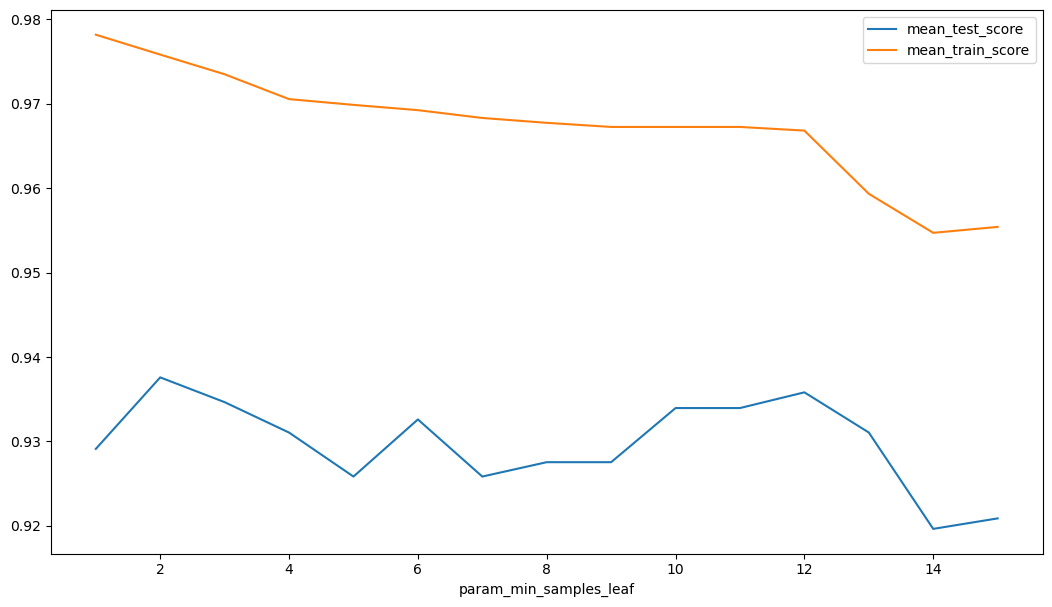

In [17]:
full_report[full_report["param_max_depth"] == 3].sort_values("param_min_samples_leaf")[["param_min_samples_leaf", "mean_test_score", "mean_train_score"]].plot(x="param_min_samples_leaf")

<AxesSubplot:xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

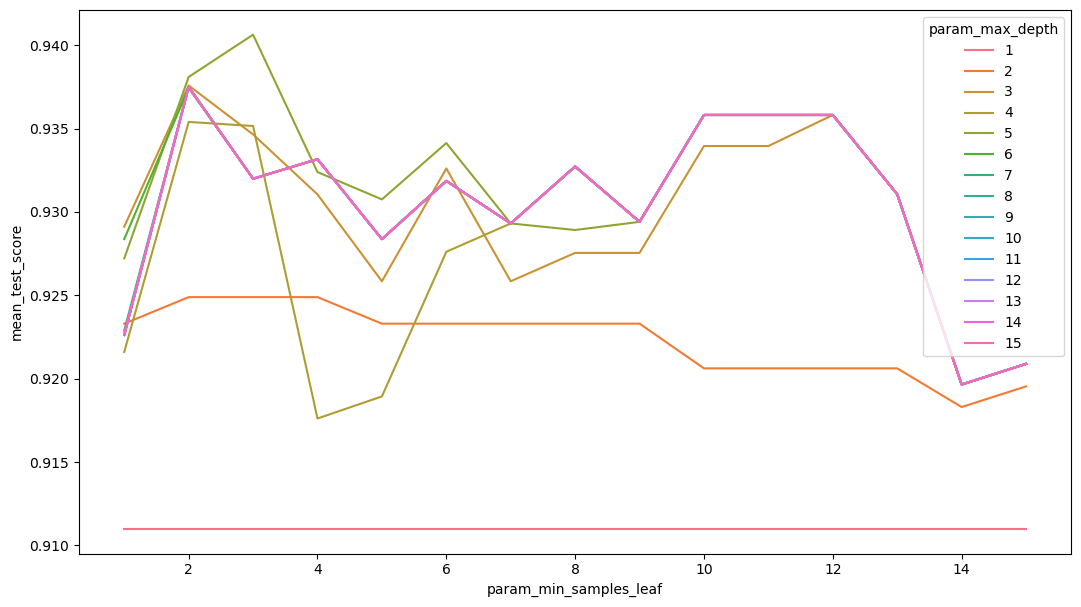

In [18]:
#full_report.groupby("param_max_depth")["mean_test_score"].plot()
sns.lineplot(data=full_report, x="param_min_samples_leaf", y="mean_test_score", hue="param_max_depth")

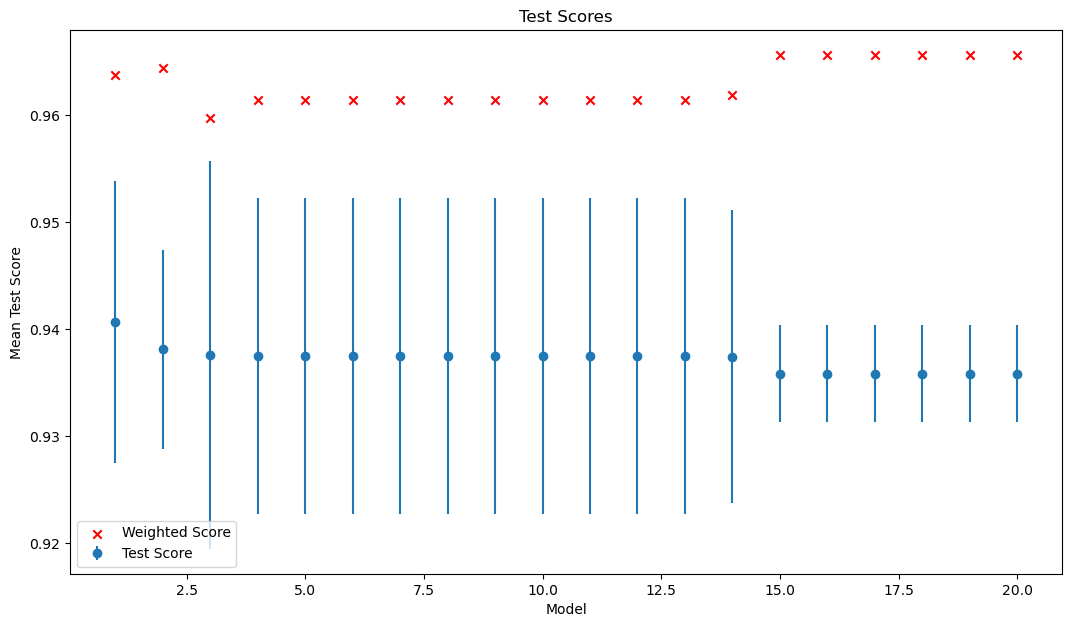

,params,mean_test_score,rank_test_score,mean_train_score,weighted_test_score
62,"{'max_depth': 5, 'min_samples_leaf': 3}",0.940631,1,0.983172,0.963721
61,"{'max_depth': 5, 'min_samples_leaf': 2}",0.938096,2,0.988270,0.964386
31,"{'max_depth': 3, 'min_samples_leaf': 2}",0.937586,3,0.975800,0.959719
181,"{'max_depth': 13, 'min_samples_leaf': 2}",0.937498,4,0.990086,0.961372
211,"{'max_depth': 15, 'min_samples_leaf': 2}",0.937498,4,0.990086,0.961372


In [19]:
dfsorted = full_report.sort_values("rank_test_score").head(20)
eplot(
  np.arange(len(dfsorted["mean_test_score"].values))+1, 
  dfsorted["mean_test_score"].values, 
  dfsorted["std_test_score"].values, 
  dfsorted["weighted_test_score"].values,
  "Test Scores", 
  "Model", 
  "Mean Test Score"
)
dfsorted[filter].head(5)

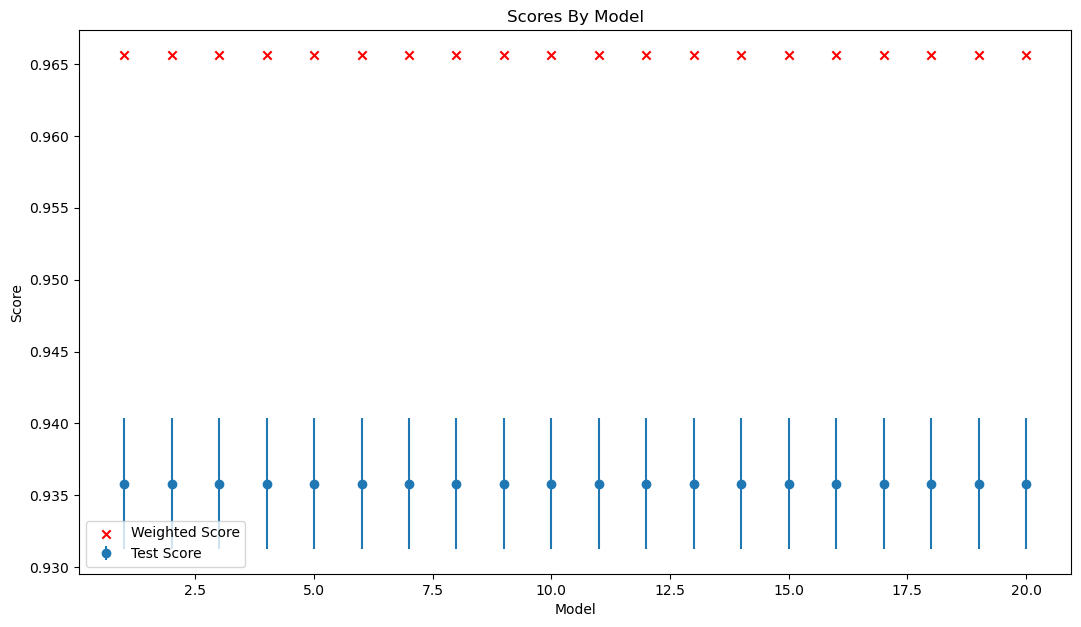

,params,mean_test_score,rank_test_score,mean_train_score,weighted_test_score
115,"{'max_depth': 8, 'min_samples_leaf': 11}",0.935816,15,0.967860,0.965636
71,"{'max_depth': 5, 'min_samples_leaf': 12}",0.935816,15,0.966801,0.965636
190,"{'max_depth': 13, 'min_samples_leaf': 11}",0.935816,15,0.967860,0.965636
189,"{'max_depth': 13, 'min_samples_leaf': 10}",0.935816,15,0.968307,0.965636
86,"{'max_depth': 6, 'min_samples_leaf': 12}",0.935816,15,0.966801,0.965636


In [20]:
dfsorted = full_report.sort_values("weighted_test_score", ascending=False).head(20)
eplot(
  np.arange(len(dfsorted["mean_test_score"].values))+1, 
  dfsorted["mean_test_score"].values, 
  dfsorted["std_test_score"].values, 
  dfsorted["weighted_test_score"].values,
  "Scores By Model", 
  "Model", 
  "Score"
)
dfsorted[filter].head(5)

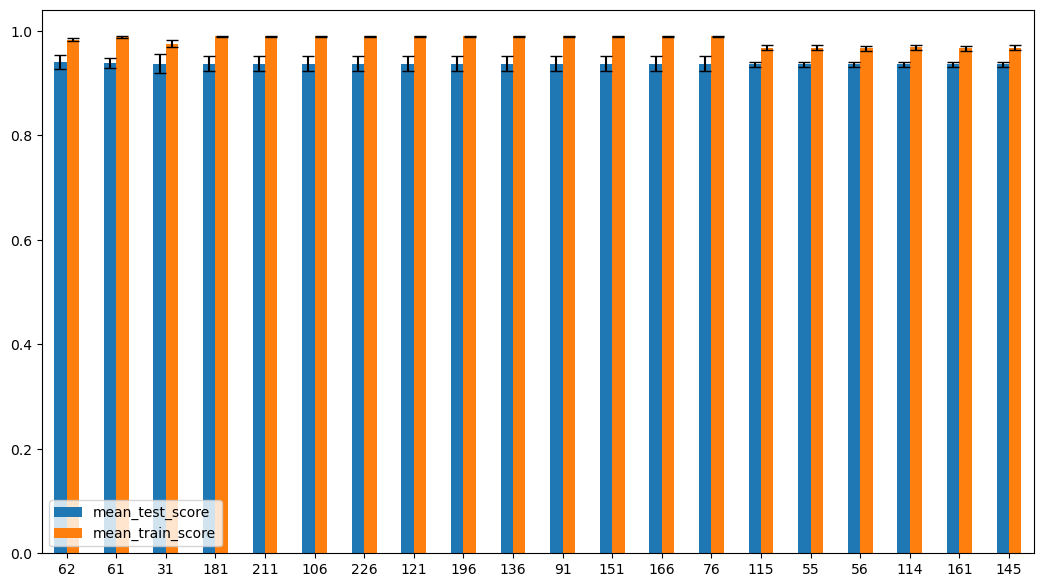

In [21]:
plot_results(full_report)

[Text(496.0, 498.3, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(275.55555555555554, 407.70000000000005, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(165.33333333333334, 317.1, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(110.22222222222223, 226.5, 'X[21] <= 30.145\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(55.111111111111114, 135.89999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(165.33333333333334, 135.89999999999998, 'X[23] <= 766.45\ngini = 0.219\nsamples = 32\nvalue = [4, 28]'),
 Text(110.22222222222223, 45.299999999999955, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(220.44444444444446, 45.299999999999955, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(220.44444444444446, 226.5, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(385.7777777777778, 317.1, 'X[26] <= 0.187\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(330.6666666666667, 226.5, 'gini 

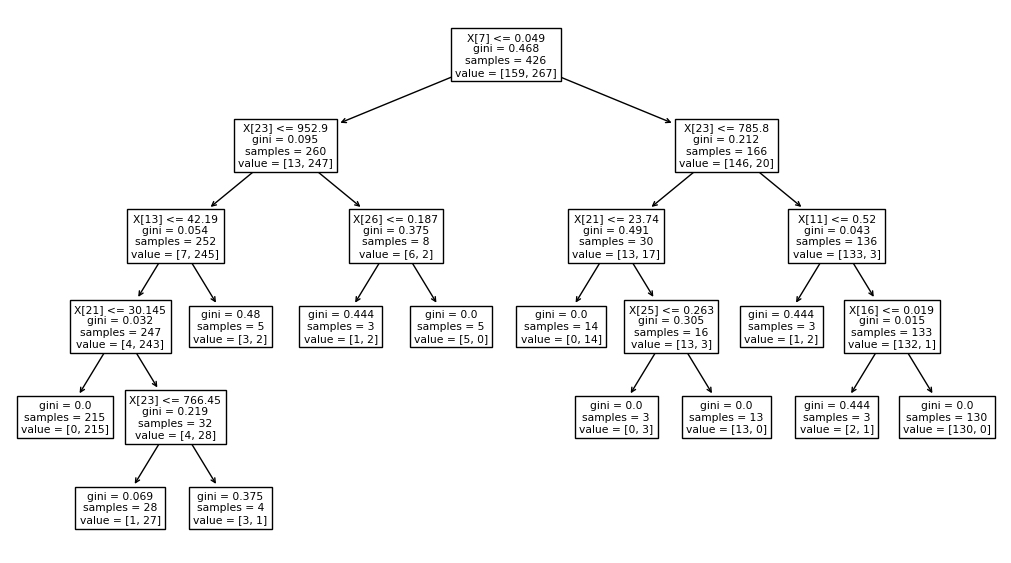

In [22]:
tree.plot_tree(model.best_estimator_)

Training Set Evaluation:
F1 =  0.967741935483871
[[154   5]
 [ 12 255]]
Test Set Evaluation:
F1 =  0.9473684210526316
[[53  0]
 [ 9 81]]


[Text(496.0, 498.3, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(305.2307692307692, 407.70000000000005, 'X[20] <= 16.825\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(228.9230769230769, 317.1, 'X[13] <= 34.405\ngini = 0.04\nsamples = 246\nvalue = [5, 241]'),
 Text(152.6153846153846, 226.5, 'X[21] <= 30.145\ngini = 0.017\nsamples = 233\nvalue = [2, 231]'),
 Text(76.3076923076923, 135.89999999999998, 'gini = 0.0\nsamples = 203\nvalue = [0, 203]'),
 Text(228.9230769230769, 135.89999999999998, 'X[1] <= 24.515\ngini = 0.124\nsamples = 30\nvalue = [2, 28]'),
 Text(152.6153846153846, 45.299999999999955, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(305.2307692307692, 45.299999999999955, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(305.2307692307692, 226.5, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(381.53846153846155, 317.1, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(686.7692307692307, 407.70000000000005, 'X[23] <= 785.8

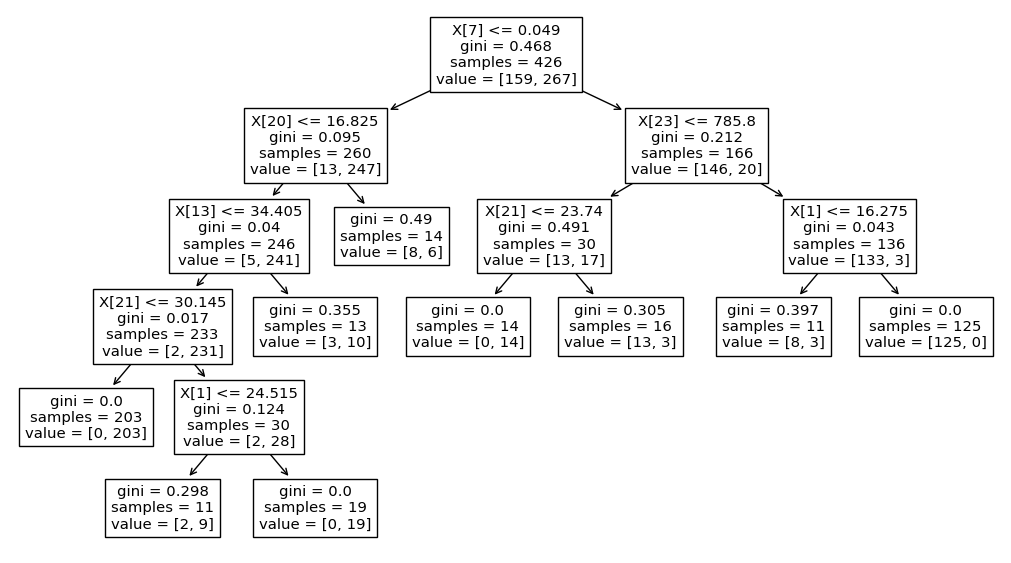

In [23]:
model = tree.DecisionTreeClassifier(max_depth=None, min_samples_leaf=11, random_state=rng)
run(x_train, x_test, y_train, y_test, model)
tree.plot_tree(model)

In [24]:
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=12, random_state=rng)
predictions = run(x_train, x_test, y_train, y_test, model)
x_test[predictions["test"] != y_test].shape

Training Set Evaluation:
F1 =  0.967741935483871
[[154   5]
 [ 12 255]]
Test Set Evaluation:
F1 =  0.9473684210526316
[[53  0]
 [ 9 81]]


(9, 30)

In [25]:
x_test[predictions["test"] != y_test].head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,...,18.22,28.07,120.30,1032.0,0.08774,0.1710,0.1882,0.08436,0.2527,0.05972
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.12770,0.3089,0.2604,0.13970,0.3151,0.08473
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.09603,0.05603,0.2035,0.06501,...,14.19,24.85,94.22,591.2,0.13430,0.2658,0.2573,0.12580,0.3113,0.08317
518,12.88,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,0.07253,...,15.05,24.37,99.31,674.7,0.14560,0.2961,0.1246,0.10960,0.2582,0.08893
500,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,...,16.76,20.43,109.70,856.9,0.11350,0.2176,0.1856,0.10180,0.2177,0.08549
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.12060,0.1722,0.2310,0.11290,0.2778,0.07012
469,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,...,13.36,25.40,88.14,528.1,0.17800,0.2878,0.3186,0.14160,0.2660,0.09270
208,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,0.07310,...,14.55,29.16,99.48,639.3,0.13490,0.4402,0.3162,0.11260,0.4128,0.10760
